# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import sqlite3
conn = sqlite3.connect('soccer.sqlite')

cur = conn.cursor()

In [2]:
def test_connection():
    cur.execute('SELECT * FROM match LIMIT 5;')
    print(cur.fetchall())

test_connection()

[(1, 1, 1, '2008/2009', 1, '2008-08-17 00:00:00', 492473, 9987, 9993, 1, 1, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1.73, 3.4, 5, 1.75, 3.35, 4.2, 1.85, 3.2, 3.5, 1.8, 3.3, 3.75, None, None, None, 1.7, 3.3, 4.33, 1.9, 3.3, 4, 1.65, 3.4, 4.5, 1.78, 3.25, 4, 1.73, 3.4, 4.2), (2, 1, 1, '2008/2009', 1, '2008-08-16 00:00:00', 492474, 10000, 9994, 0, 0, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 

In [3]:
import pandas as pd

def select_epl_matches():
    df = pd.read_sql_query('SELECT * FROM match WHERE league_id = 1729;', conn)
    return df

epl_df = select_epl_matches()
epl_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10.00,1.28,5.5,12.00,1.30,4.75,10.0,1.29,4.50,11.00
1,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,12.00,1.25,6.0,13.00,1.22,5.50,13.0,1.22,5.00,13.00
2,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1.73,5.50,3.8,1.65,5.00,3.40,1.7,4.50,3.40,1.73
3,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.25,3.80
4,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.30,3.75


In [5]:
epl_goals_df = epl_df[['season', 'home_team_goal', 'away_team_goal']]
epl_goals_df['total_goals'] = epl_goals_df['home_team_goal'] + epl_goals_df['away_team_goal']
epl_goals_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,season,home_team_goal,away_team_goal,total_goals
0,2008/2009,1,1,2
1,2008/2009,1,0,1
2,2008/2009,0,1,1
3,2008/2009,2,1,3
4,2008/2009,4,2,6


In [6]:
epl_avg_goals_by_season = epl_goals_df.groupby('season').mean()
epl_avg_goals_by_season

,home_team_goal,away_team_goal,total_goals
season,,,
2008/2009,1.400000,1.078947,2.478947
2009/2010,1.697368,1.073684,2.771053
2010/2011,1.623684,1.173684,2.797368
2011/2012,1.589474,1.215789,2.805263
2012/2013,1.557895,1.239474,2.797368
2013/2014,1.573684,1.194737,2.768421
2014/2015,1.473684,1.092105,2.565789
2015/2016,1.492105,1.207895,2.700000


In [7]:
def select_all_matches():
    df = pd.read_sql_query('SELECT * FROM match LEFT JOIN league ON league.id = match.league_id;', conn)
    return df

all_df = select_all_matches()
all_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id,country_id,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,1,Belgium Jupiler League


In [8]:
all_goals_df = all_df[['name', 'season', 'home_team_goal', 'away_team_goal']]
all_goals_df['total_goals'] = all_goals_df['home_team_goal'] + all_goals_df['away_team_goal']
all_goals_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,season,home_team_goal,away_team_goal,total_goals
0,Belgium Jupiler League,2008/2009,1,1,2
1,Belgium Jupiler League,2008/2009,0,0,0
2,Belgium Jupiler League,2008/2009,0,3,3
3,Belgium Jupiler League,2008/2009,5,0,5
4,Belgium Jupiler League,2008/2009,1,3,4


In [9]:
all_avg_goals_by_season = all_goals_df.groupby(['name', 'season']).mean()
all_avg_goals_by_season

home_team_goal  away_team_goal  \
name                     season                                      
Belgium Jupiler League   2008/2009        1.630719        1.163399   
                         2009/2010        1.466667        1.223810   
                         2010/2011        1.591667        1.054167   
                         2011/2012        1.754167        1.125000   
                         2012/2013        1.562500        1.366667   
                         2013/2014        1.500000        1.000000   
                         2014/2015        1.566667        1.216667   
                         2015/2016        1.675000        1.216667   
England Premier League   2008/2009        1.400000        1.078947   
                         2009/2010        1.697368        1.073684   
                         2010/2011        1.623684        1.173684   
                         2011/2012        1.589474        1.215789   
                         2012/2013        1.557895        1.239474   
                         2013/2014        1.573684        1.194737   
                         2014/2015        1.473684        1.092105   
                         2015/2016        1.492105        1.207895   
France Ligue 1           2008/2009        1.286842        0.971053   
                         2009/2010        1.389474        1.021053   
                         2010/2011        1.342105        1.000000   
                         2011/2012        1.473684        1.042105   
                         2012/2013        1.468421        1.076316   
                         2013/2014        1.415789        1.039474   
                         2014/2015        1.410526        1.081579   
                         2015/2016        1.436842        1.089474   
Germany 1. Bundesliga    2008/2009        1.699346        1.222222   
                         2009/2010        1.513072        1.316993   
                         2010/2011        1.647059        1.274510   
                         2011/2012        1.660131        1.199346   
                         2012/2013        1.591503        1.343137   
                         2013/2014        1.748366        1.411765   
...                                            ...             ...   
Portugal Liga ZON Sagres 2010/2011        1.312500        1.120833   
                         2011/2012        1.495833        1.145833   
                         2012/2013        1.504167        1.275000   
                         2013/2014        1.329167        1.041667   
                         2014/2015        1.450980        1.042484   
                         2015/2016        1.513072        1.202614   
Scotland Premier League  2008/2009        1.320175        1.083333   
                         2009/2010        1.407895        1.157895   
                         2010/2011        1.381579        1.179825   
                         2011/2012        1.381579        1.254386   
                         2012/2013        1.478070        1.254386   
                         2013/2014        1.513158        1.232456   
                         2014/2015        1.447368        1.127193   
                         2015/2016        1.504386        1.346491   
Spain LIGA BBVA          2008/2009        1.660526        1.236842   
                         2009/2010        1.600000        1.113158   
                         2010/2011        1.636842        1.105263   
                         2011/2012        1.678947        1.084211   
                         2012/2013        1.686842        1.184211   
                         2013/2014        1.631579        1.118421   
                         2014/2015        1.536842        1.118421   
                         2015/2016        1.618421        1.126316   
Switzerland Super League 2008/2009        1.755556        1.244444   
                         2009/2010        1.994444        1.333333   
                         2010/2011        1.57

In [10]:
import matplotlib.pyplot as plt

plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [24]:
import seaborn as sns

sns.set_palette(sns.color_palette("hls", 11))

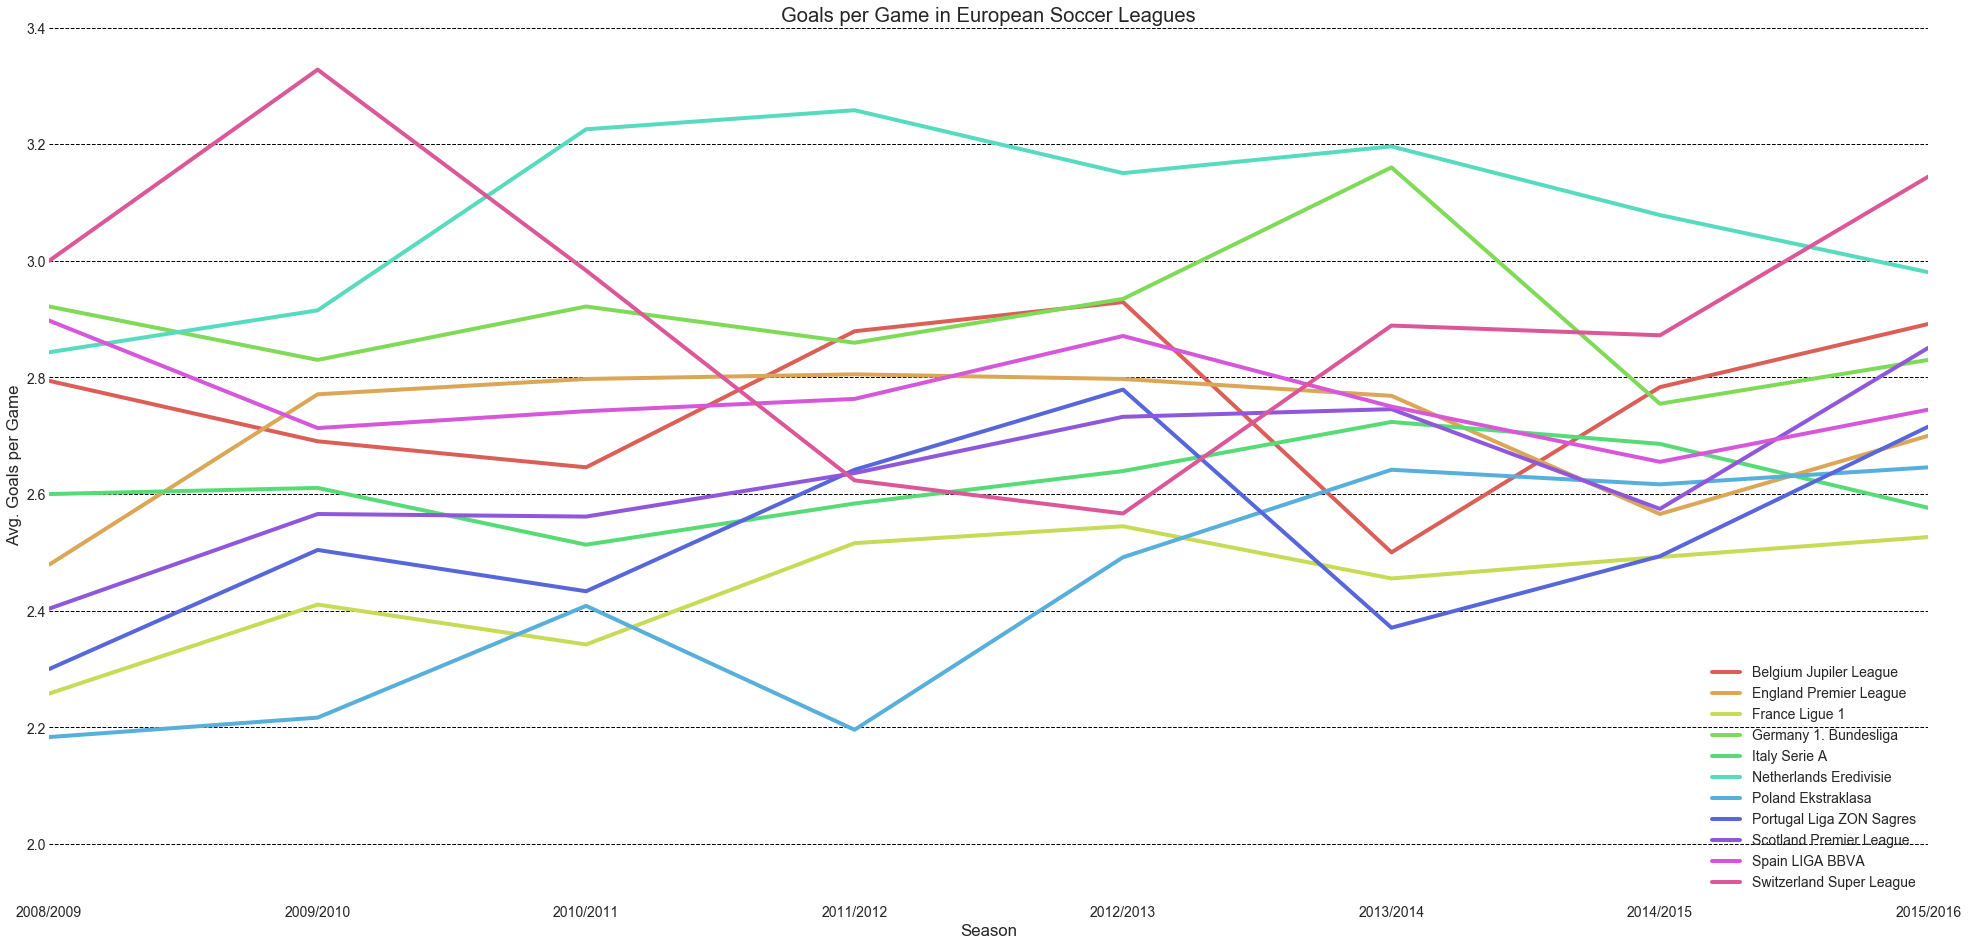

In [56]:
# # plot data
fig, ax = plt.subplots(figsize=(30, 15))

# use unstack()
all_goals_df.groupby(['season', 'name']).mean()['total_goals'].unstack().plot(ax=ax)
plt.title('Goals per Game in European Soccer Leagues')
ax.set_xlabel('Season')
ax.set_ylabel('Avg. Goals per Game')
ax.set_facecolor('white')
ax.set_ylim([1.9,3.4])
ax.grid(color='black', linestyle='--', axis='y', linewidth=1)
plt.legend(loc=4)
plt.show()